This notebook demonstrates the usage of the KNN algorithm for classification using Euclidean distance. It provides a step-by-step explanation and visualization of how to create a KNN package from scratch, along with detailed code explanations.

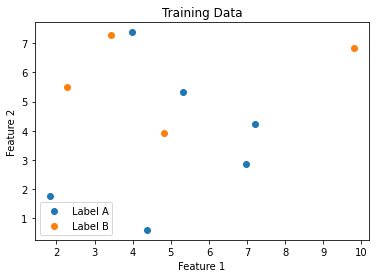

In [1]:
# create a training dataset with 2-dimension(feature 1, feature 2)
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)  # Set a seed for reproducibility

# Generate random training data
X_train = np.random.rand(10, 2) * 10
y_train = np.random.choice(['A', 'B'], size=10)

# Plotting training data with color-coded labels
unique_labels = np.unique(y_train)
for label in unique_labels:
    indices = np.where(y_train == label)
    plt.scatter(X_train[indices, 0], X_train[indices, 1], label=f'Label {label}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data')
plt.legend()
plt.show()


In [2]:
# predict the label of x
np.random.seed(234) 
x = np.random.rand(1, 2)*10
print(x)

[[0.30967343 2.54282073]]


In [3]:
# calculate the euclidean_distance between x with each training data point
distances = [np.sqrt(np.sum(x-x_train)**2)for x_train in X_train]
print(distances)

[6.973591038439794, 4.929168059428327, 8.573260132057625, 13.80344520265217, 5.878000029742498, 7.869783068306495, 2.1300072458493107, 8.507902443582054, 0.7269406989673088, 7.781295442344428]


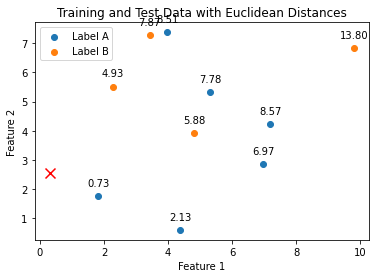

In [4]:
#visualize the distance
unique_labels = np.unique(y_train)
for label in unique_labels:
    indices = np.where(y_train == label)
    plt.scatter(X_train[indices, 0], X_train[indices, 1], label=f'Label {label}')

plt.scatter(x[0][0], x[0][1], c='red', marker='x', s=100)

# Adding distance labels to training data points
for i, distance in enumerate(distances):
    plt.annotate(f"{distance:.2f}", (X_train[i, 0], X_train[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training and Test Data with Euclidean Distances')
plt.legend()
plt.show()

In [5]:
# sorts the distance list in ascending order and returns the indices of the k nearest neighbors (the k smallest distances). 
# for this exmple we set k=3
k_indices = np.argsort(distances)[:3]
print(k_indices)

[8 6 1]


In [6]:
# retrieves the corresponding labels (y_train) for the k_indices obtained in the previous step. 
k_nearest_labels = [y_train[i] for i in k_indices]
print(k_nearest_labels)

['A', 'A', 'B']


In [7]:
#determine the most common label among the nearest neighbors. 
from collections import Counter
Counter(k_nearest_labels).most_common(1)[0][0]

'A'

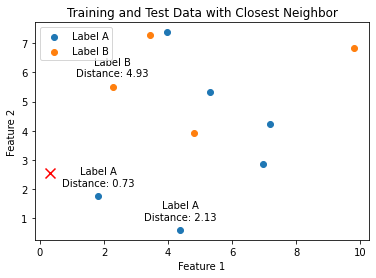

In [8]:
#visualize the nearest neighbors

unique_labels = np.unique(y_train)
for label in unique_labels:
    indices = np.where(y_train == label)
    plt.scatter(X_train[indices, 0], X_train[indices, 1], label=f'Label {label}')

plt.scatter(x[0][0], x[0][1], c='red', marker='x', s=100)

# Adding label and distance for the closest neighbor
for i in k_indices:
    plt.annotate(f"Label {y_train[i]}\nDistance: {distances[i]:.2f}", (X_train[i, 0], X_train[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training and Test Data with Closest Neighbor')
plt.legend()
plt.show()

Knn package

In [9]:
import numpy as np
from scipy.spatial.distance import cosine
from collections import Counter

The KNN class has the following methods:

In [10]:
class KNN:
    '''
    This is the class constructor that initializes the KNN object. 
    It takes three parameters: k, distance_metric, and task_type. 
    The k parameter specifies the number of nearest neighbors to consider, 
    the distance_metric parameter determines the distance metric used (either 'euclidean' or 'cosine'),
    and the task_type parameter specifies the type of task ('classification' or 'regression').
    '''
    def __init__(self,k=3,distance_metric='euclidean',task_type='classfication'):
        self.k = k
        self.distance_metric = distance_metric
        self.task_type = task_type
    
    '''
    This method calculates the distance between two data points x1 and x2 based on the selected distance metric. 
    It delegates to either euclidean_distance or cosine_similarity depending on the distance_metric parameter.
    '''
     
    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return self.euclidean_distance(x1,x2)
        elif self.distance_metric == 'cosine':
            return self.euclidean_distance(x1,x2)
        else:
            raise ValueError('Invalid distance metric')
            
    '''
    This method computes the Euclidean distance between two data points x1 and x2 using NumPy's vectorized operations.
    '''
    def euclidean_distance(self,x1,x2):
        return np.sqrt(np.sum(x1-x2)**2)
    
    '''
    This method computes the cosine similarity between two data points x1 and x2 using the cosine function imported from scipy.spatial.distance.
    '''
    def cosine_similarity(self, x1, x2):
        return 1 - cosine(x1, x2)
    
    '''
    This method is used to fit the KNN model to the training data. 
    It takes the feature matrix X and the corresponding labels y as input and stores them as attributes of the KNN object.
    '''
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
    
    '''
    This method predicts the labels for the input data matrix X. It iterates over each data point in X and calls the _predict method to determine the predicted label.
    '''
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
     
    '''
    _predict(self, x): This private method calculates the distances between the input data point x and the training data, 
    identifies the k nearest neighbors, and performs the majority voting (classification) or averaging (regression) to determine the predicted label.
    '''
    def _predict(self, x):
        #calculates the distance between the input data point x and all the training data points (x_train) 
        #by calling the calculate_distance method for each training data point. The distances are stored in a list called distance.
        distance = [self.calculate_distance(x,x_train) for x_train in self.X_train]
        #sorts the distance list in ascending order and returns the indices of the self.k nearest neighbors (the k smallest distances). 
        k_indices = np.argsort(distance)[:self.k]
        # retrieves the corresponding labels (y_train) for the k_indices obtained in the previous step. 
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        if self.task_type == 'classification':
            most_common = Counter(k_nearest_labels).most_common(1)
            return most_common[0][0]
        elif self.task_type == 'regression':
            return np.mean(k_nearest_labels)
        else:
            raise ValueError('Invalid task type')

In [11]:
# Example usage

# with previous example

X_test = np.array([[2, 3], [6, 7]])
print("x_test: ", X_test)

# Create an instance of the KNN classifier
knn = KNN(k=3, distance_metric='euclidean', task_type='classification')

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

print("Predicted labels:", y_pred)

x_test:  [[2 3]
 [6 7]]
Predicted labels: ['A' 'A']


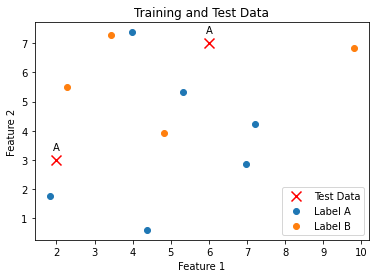

In [12]:
# Plotting training data
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training Data')

# Plotting test data
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', marker='x', label='Test Data', s=100)

unique_labels = np.unique(y_train)
for label in unique_labels:
    indices = np.where(y_train == label)
    plt.scatter(X_train[indices, 0], X_train[indices, 1], label=f'Label {label}')

for i, label in enumerate(y_pred):
    plt.annotate(label, (X_test[i, 0], X_test[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

    
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training and Test Data')
plt.legend(loc='lower right')
plt.show()